# Offline plotting with complex data

This notebook is a collection of plotting examples using `plot_by_id` and complex data. We cover the cases where the dependent (measured) parameter is complex, and the case where the independent parameter is complex.

The main idea is always that one complex parameter is converted into two real parameters.

In [1]:
%matplotlib notebook
import numpy as np

from qcodes import Parameter, Measurement, initialise_database, load_or_create_experiment
from qcodes.dataset.plotting import plot_by_id

In [2]:
initialise_database()
exp = load_or_create_experiment('offline_plotting_complex_numbers', '')

offline_plotting_complex_numbers#some_sample#16@C:\Users\wihpniel\src\Qcodes\docs\examples\DataSet\experiments.db
-----------------------------------------------------------------------------------------------------------------

## Case A: a complex number as a function of a real number

In [3]:
meas_A = Measurement(exp)
meas_A.register_custom_parameter(name='freqs',
                                 label='Frequency',
                                 unit='Hz',
                                 paramtype='numeric')
meas_A.register_custom_parameter(name='iandq',
                                 label='Signal I and Q',
                                 unit='V^2/Hz',
                                 paramtype='complex',
                                 setpoints=['freqs'])

In [4]:
N = 1000
freqs = np.linspace(0, 1e6, N)
signal = np.cos(2*np.pi*1e-6*freqs) + 1j*np.sin(2*np.pi*1e-6*freqs)

with meas_A.run() as datasaver:
    datasaver.add_result(('freqs', freqs), ('iandq', signal))

run_A_id = datasaver.run_id

Starting experimental run with id: 54


When visualising the data, `plot_by_id` will turn the complex `signal` parameter into to real parameters. The `plot_by_id` function can do that in one of two ways: either as real and imaginary part or as magnitude and phase. Real and imaginary is the default.

<IPython.core.display.Javascript object>


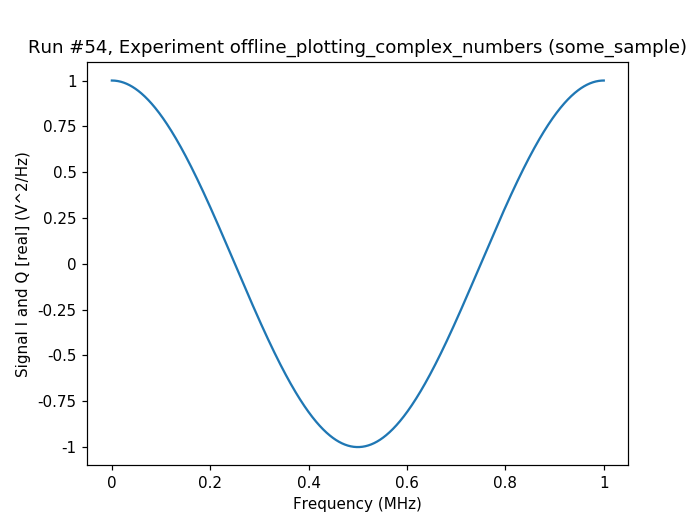

<IPython.core.display.Javascript object>


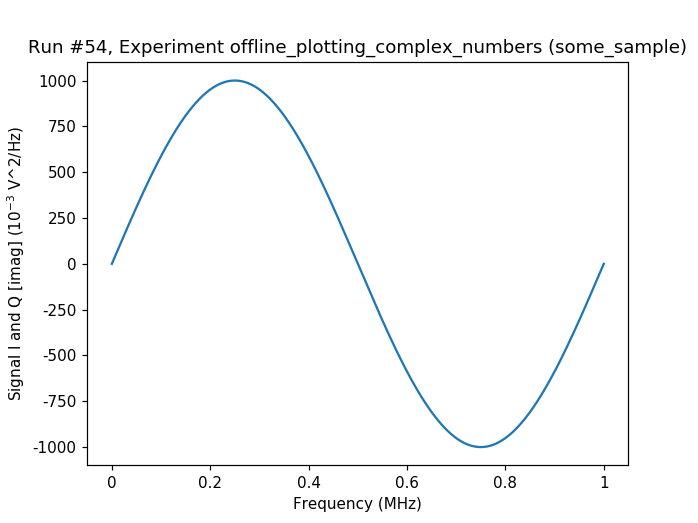

In [5]:
axs, cbs = plot_by_id(run_A_id)

<IPython.core.display.Javascript object>


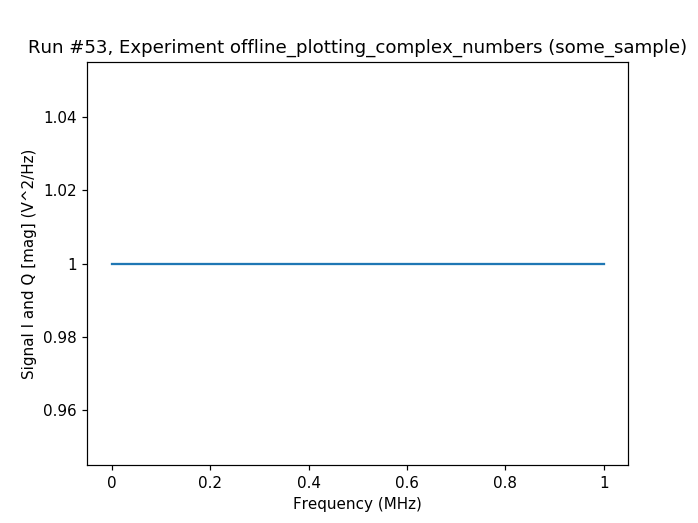

<IPython.core.display.Javascript object>


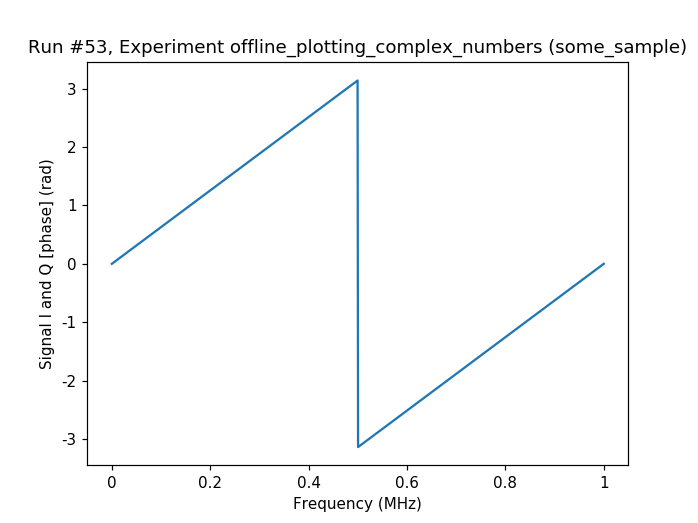

In [7]:
axs, cbs = plot_by_id(run_A_id, complex_plot_type='mag_and_phase')

Note that the phase can be visualized either in degrees or in radians. The keyword argument `complex_plot_phase` controls this behaviour. The default is radians.

<IPython.core.display.Javascript object>


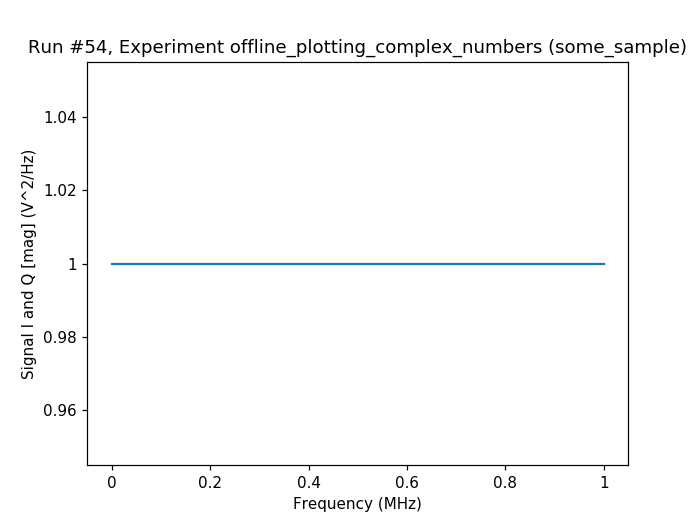

<IPython.core.display.Javascript object>


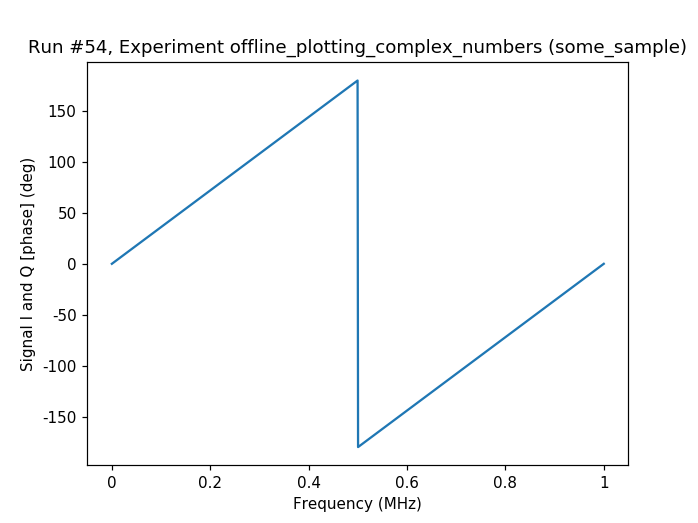

In [6]:
axs, cbs = plot_by_id(run_A_id,
                      complex_plot_type='mag_and_phase',
                      complex_plot_phase='degrees')

## Case B: a complex number as a function of two real numbers

In [7]:
meas_B = Measurement(exp)
meas_B.register_custom_parameter(name='freqs',
                                 label='Frequency',
                                 unit='Hz',
                                 paramtype='numeric')
meas_B.register_custom_parameter(name='magfield',
                                 label='Magnetic field',
                                 unit='T',
                                 paramtype='numeric')
meas_B.register_custom_parameter(name='iandq',
                                 label='Signal I and Q',
                                 unit='V^2/Hz',
                                 paramtype='complex',
                                 setpoints=['freqs', 'magfield'])

In [8]:
N = 250
M = 20
freqs = np.linspace(0, 1e6, N)
fields = np.linspace(0, 2, M)

with meas_B.run() as datasaver:
    for field in fields:
        phis = 2*np.pi*field*1e-6*freqs
        signal = np.cos(phis) + 1j*np.sin(phis)
        datasaver.add_result(('freqs', freqs), ('iandq', signal),
                             ('magfield', field))

run_B_id = datasaver.run_id

Starting experimental run with id: 55


When visualising this run, we get two plots just as in the previous case. This time, however, the plots are heatmaps and not line plots.

<IPython.core.display.Javascript object>


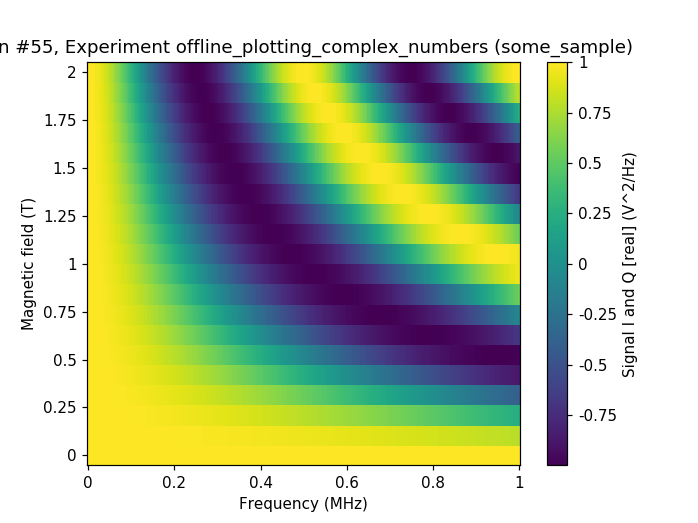

<IPython.core.display.Javascript object>


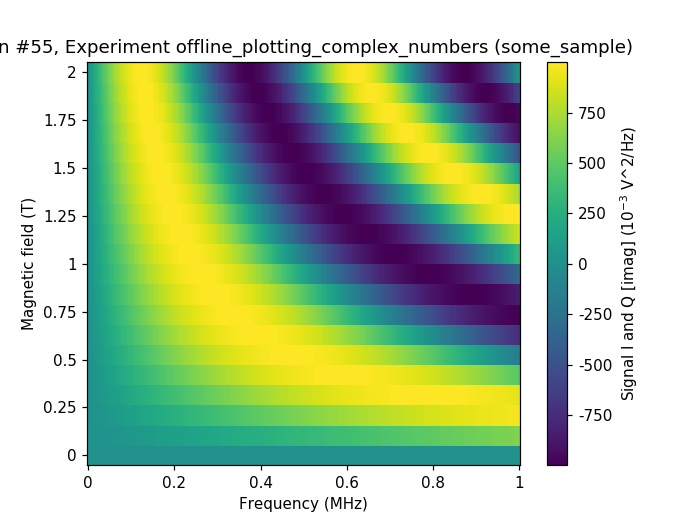

In [9]:
axs, cbs = plot_by_id(run_B_id, complex_plot_type='real_and_imag')

<IPython.core.display.Javascript object>


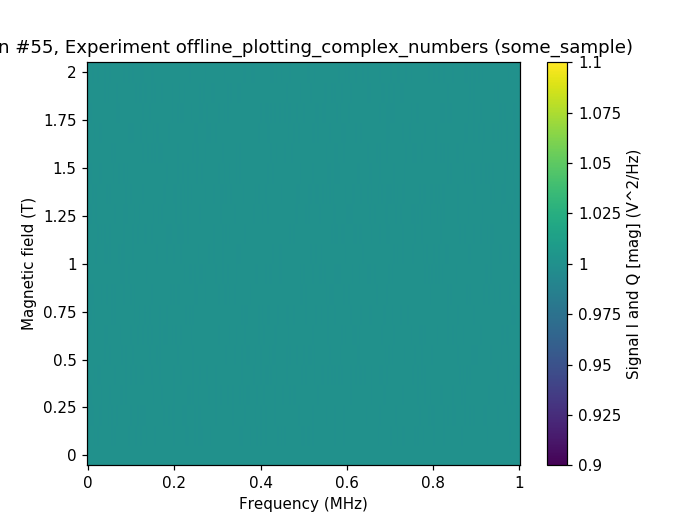

<IPython.core.display.Javascript object>


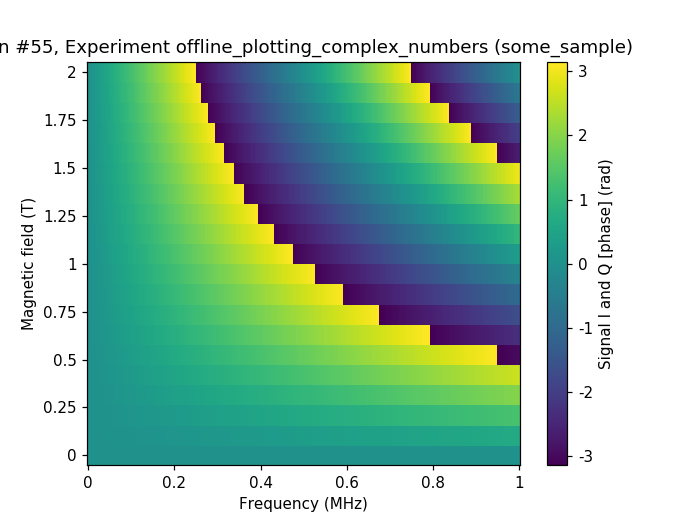

In [10]:
axs, cbs = plot_by_id(run_B_id, complex_plot_type='mag_and_phase')

## Case C: a real number as a function of a complex number

As expected, the single complex setpoint parameter is turned into two real-valued setpoint parameters.

In [11]:
meas_C = Measurement(exp)
meas_C.register_custom_parameter(name='iandq',
                                 label='Signal I and Q',
                                 unit='V^2/Hz',
                                 paramtype='complex')
meas_C.register_custom_parameter(name='temp',
                                 label='Temperature',
                                 unit='K',
                                 paramtype='numeric',
                                 setpoints=['iandq'])

In [12]:
N = 250
phis = 2*np.pi*np.linspace(0, 1, N)
signal = phis**2*(np.cos(phis) + 1j*np.sin(phis))
heat = np.abs(signal)

with meas_C.run() as datasaver:
    datasaver.add_result(('iandq', signal), ('temp', heat))
    
run_C_id = datasaver.run_id

Starting experimental run with id: 56


<IPython.core.display.Javascript object>


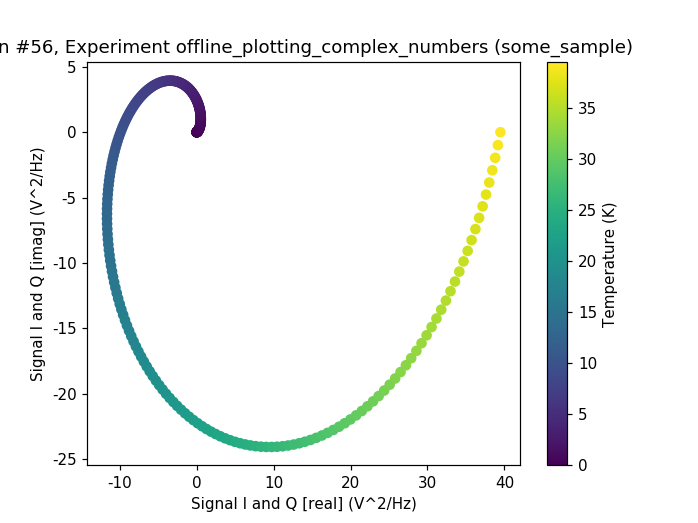

In [13]:
axs, cbs = plot_by_id(run_C_id)

<IPython.core.display.Javascript object>


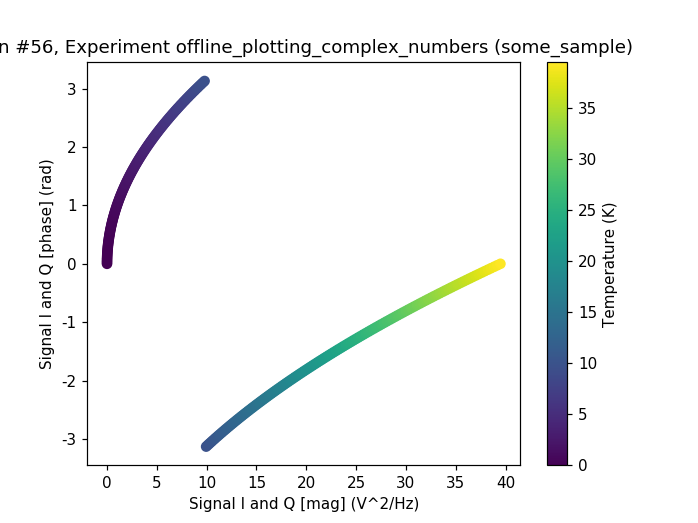

c:\users\wihpniel\src\qcodes\qcodes\dataset\data_export.py:131: RuntimeWarning: divide by zero encountered in true_divide
  remainders = np.mod(steps[1:]/steps[0], 1)
c:\users\wihpniel\src\qcodes\qcodes\dataset\data_export.py:131: RuntimeWarning: invalid value encountered in remainder
  remainders = np.mod(steps[1:]/steps[0], 1)


In [14]:
axs, cbs = plot_by_id(run_C_id, complex_plot_type='mag_and_phase')